In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/DoAn2")

Mounted at /content/drive


# Áp dụng các kỹ thuật học máy để dự đoán khách hàng có khả năng đăng ký tài khoản tiết kiệm có kỳ hạn

In [1]:
import pandas as pd    # For data manipulation
import numpy as np    # For mathematical calculations
import matplotlib.pyplot as pb  # For data visualization and graphical plotting
import seaborn as sb            # For data visualization and exploratory data analysis
from sklearn.preprocessing import LabelEncoder # For converting categorical data into numerical
from sklearn.preprocessing import MinMaxScaler # For scaling the data
from sklearn.model_selection import train_test_split # For dividing data into train and test
from sklearn.ensemble import RandomForestClassifier  # RandomForest Classification
from sklearn.tree import DecisionTreeClassifier      # Decision Tree Classification
from sklearn.metrics import f1_score    #F1 Score
from sklearn.metrics import precision_score #Precision Score
from sklearn.metrics import classification_report  #For Classification Report
import scipy.stats as stats


In [ ]:
data=pd.read_csv("Assignment-2_Data.csv")
data.tail()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,46211,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361,2,188,11,other,no


ID:  số định danh (ID)
Age:  tuổi của khách hàng.
Job: nghề nghiệp hoặc công việc hiện tại của khách hàng
Marital:  tình trạng hôn nhân của khách hàng
 Education:  trình độ học vấn hoặc mức độ giáo dục của khách hàng, v
Default:  khách hàng có vướng vào tình trạng mặc định (nợ không trả) hay không
Balance:  về số dư tài khoản ngân hàng của khách hàng.
Housing: có sở hữu bất động sản (nhà ở) hay không
Loan:  khách hàng có khoản vay (mượn) hay không
Contact: phương thức liên hệ với khách hàng
Day: n ngày trong tháng khi khách hàng được liên hệ.
Month:  tháng trong năm khi khách hàng được liên hệ.
Duration:  về thời gian trò chuyện hoặc tương tác cuộc gọi trước đó với khách hàng (giây)
Campaign:cuộc gọi trong chiến dịch tiếp thị cụ thể đối với khách hàng.
Pdays:  đến số ngày kể từ lần liên hệ cuối cùng với khách hàng. Nếu khách hàng chưa từng được liên hệ, giá trị có thể được đánh dấu là -1 hoặc giá trị tương tự
Previous:  số lượng lần liên hệ trước đó với khách hàng.
Poutcome: Trường này mô tả kết quả của chiến dịch tiếp thị trước đó, ví dụ: "thành công", "thất bại", "không thành công",...

In [ ]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

## Exploratory Data Analysis (EDA)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [ ]:
data.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data.isnull().sum() # Checking if null values are present

Id           0
age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
print(data.duplicated().value_counts())

False    45211
dtype: int64


In [ ]:
data.dropna(inplace=True)

In [ ]:
# numberic data
data._get_numeric_data().columns.tolist()

['Id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
# categorical variables
categorical_data = data.select_dtypes(exclude="number")
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [ ]:
#  numerical variables
numerical_data = data.select_dtypes(include="number")
numerical_data.head()

,Id,age,balance,day,duration,campaign,pdays,previous
0,1001,999.0,2143.0,5,261,1,-1,0
1,1002,44.0,29.0,5,151,1,-1,0
2,1003,33.0,2.0,5,76,1,-1,0
3,1004,47.0,1506.0,5,92,1,-1,0
4,1005,33.0,1.0,5,198,1,-1,0


## Summary for each columns

---



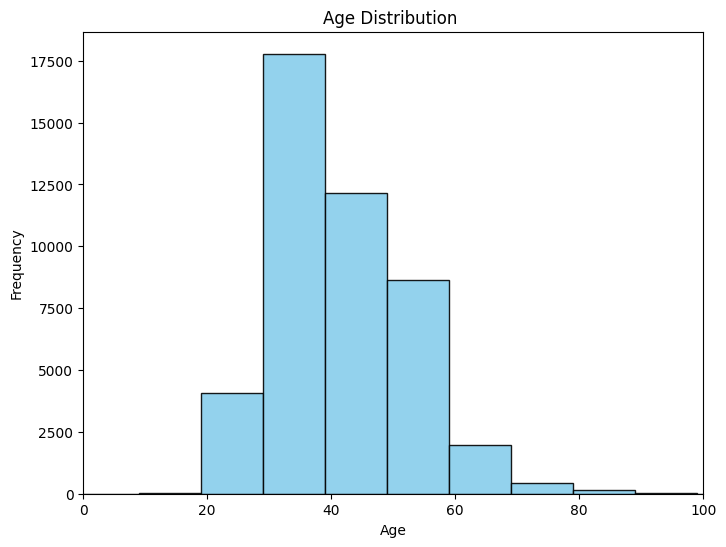

count    45200.000000
mean        40.954292
std         11.539117
min         -1.000000
25%         33.000000
50%         39.000000
75%         48.000000
max        999.000000
Name: age, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(data['age'], bins=100, edgecolor='k', alpha=0.9, color='skyblue')
plt.xlim(0, 100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution ')
plt.show()

data['age'].describe()

<Axes: >

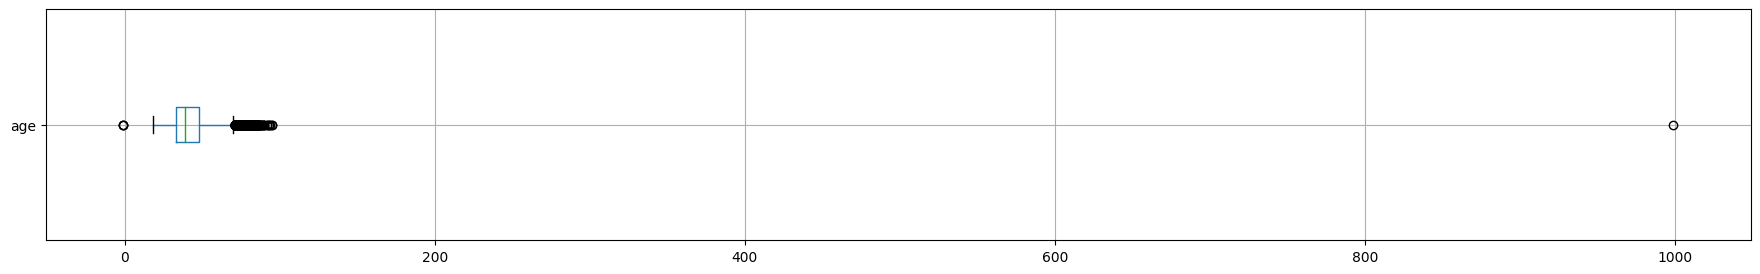

In [ ]:
pb.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(data, columns=['age'])
temp_df.boxplot(vert=False)

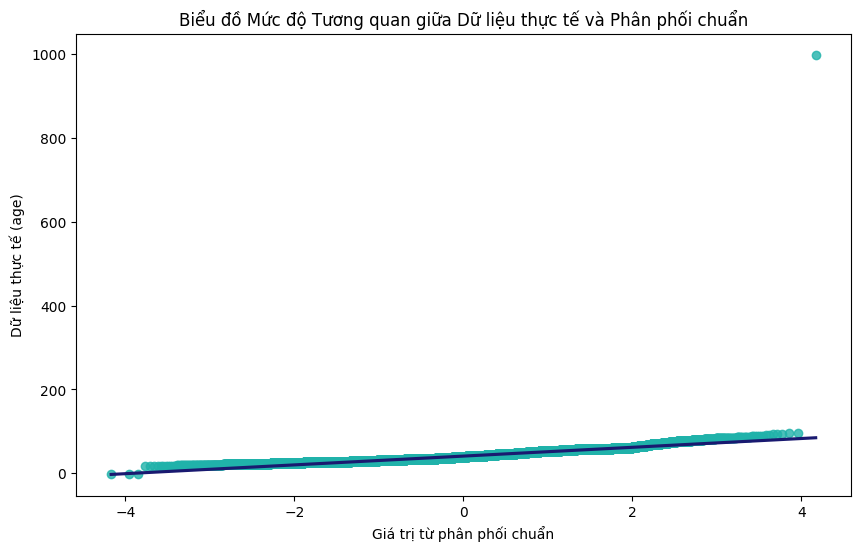

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Thiết lập kích thước của hình vẽ
plt.rcParams["figure.figsize"] = (10, 6)

# Tạo biểu đồ probplot và lấy giá trị cần thiết
probplot = stats.probplot(data["age"], dist="norm", fit=False)
x_values = probplot[0]
y_values = probplot[1]
plt.title("Biểu đồ Mức độ Tương quan giữa Dữ liệu thực tế và Phân phối chuẩn")
plt.xlabel("Giá trị từ phân phối chuẩn")
plt.ylabel("Dữ liệu thực tế (age)")
# Vẽ biểu đồ probplot bằng seaborn
sns.regplot(x=x_values, y=y_values, scatter_kws={'color': '#20B2AA'}, line_kws={'color': '#191970'})

# Hiển thị biểu đồ
plt.show()



In [ ]:
data = data[data['age']>= 18]
data = data[data['age']< 120]

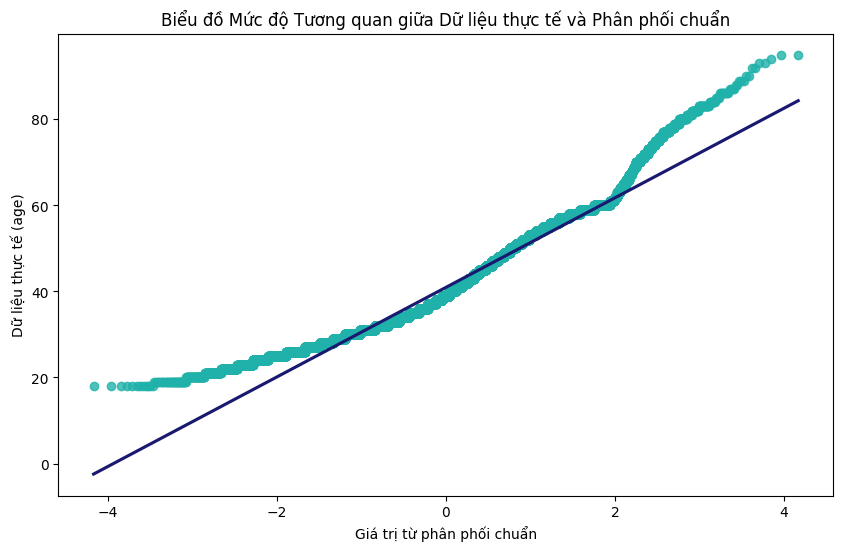

In [ ]:
# Thiết lập kích thước của hình vẽ
plt.rcParams["figure.figsize"] = (10, 6)

# Tạo biểu đồ probplot và lấy giá trị cần thiết
probplot = stats.probplot(data["age"], dist="norm", fit=False)
x_values = probplot[0]
y_values = probplot[1]
plt.title("Biểu đồ Mức độ Tương quan giữa Dữ liệu thực tế và Phân phối chuẩn")
plt.xlabel("Giá trị từ phân phối chuẩn")
plt.ylabel("Dữ liệu thực tế (age)")
# Vẽ biểu đồ probplot bằng seaborn
sns.regplot(x=x_values, y=y_values, scatter_kws={'color': '#20B2AA'}, line_kws={'color': '#191970'})
# Hiển thị biểu đồ
plt.show()


In [ ]:
#duration

<Axes: >

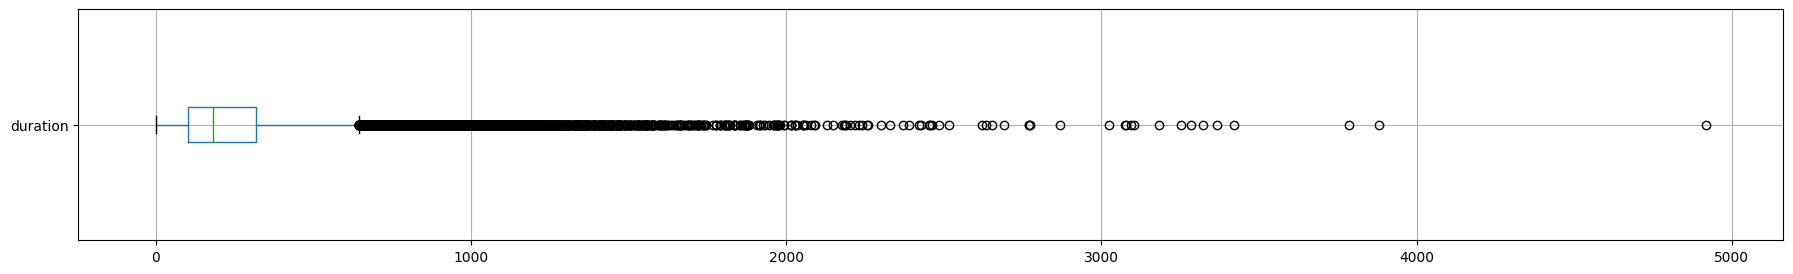

In [ ]:
pb.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(data, columns=['duration'])
temp_df.boxplot(vert=False)

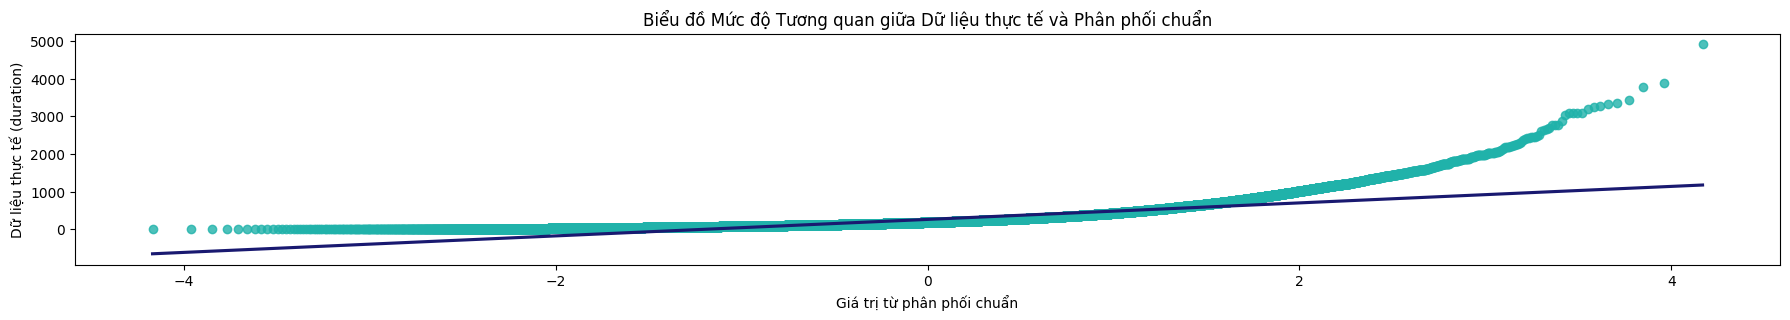

In [ ]:
# Tạo biểu đồ probplot và lấy giá trị cần thiết
probplot = stats.probplot(data["duration"], dist="norm", fit=False)
x_values = probplot[0]
y_values = probplot[1]
plt.title("Biểu đồ Mức độ Tương quan giữa Dữ liệu thực tế và Phân phối chuẩn")
plt.xlabel("Giá trị từ phân phối chuẩn")
plt.ylabel("Dữ liệu thực tế (duration)")
# Vẽ biểu đồ probplot bằng seaborn
sns.regplot(x=x_values, y=y_values, scatter_kws={'color': '#20B2AA'}, line_kws={'color': '#191970'})
# Hiển thị biểu đồ
plt.show()

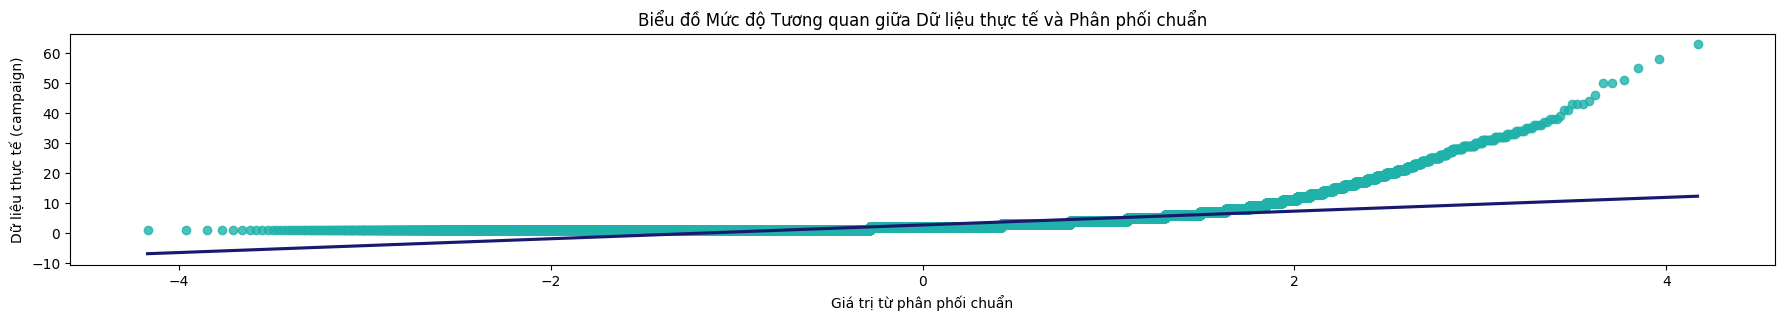

In [ ]:

# Tạo biểu đồ probplot và lấy giá trị cần thiết
probplot = stats.probplot(data["campaign"], dist="norm", fit=False)
x_values = probplot[0]
y_values = probplot[1]
plt.title("Biểu đồ Mức độ Tương quan giữa Dữ liệu thực tế và Phân phối chuẩn")
plt.xlabel("Giá trị từ phân phối chuẩn")
plt.ylabel("Dữ liệu thực tế (campaign)")
# Vẽ biểu đồ probplot bằng seaborn
sns.regplot(x=x_values, y=y_values, scatter_kws={'color': '#20B2AA'}, line_kws={'color': '#191970'})
# Hiển thị biểu đồ
plt.show()

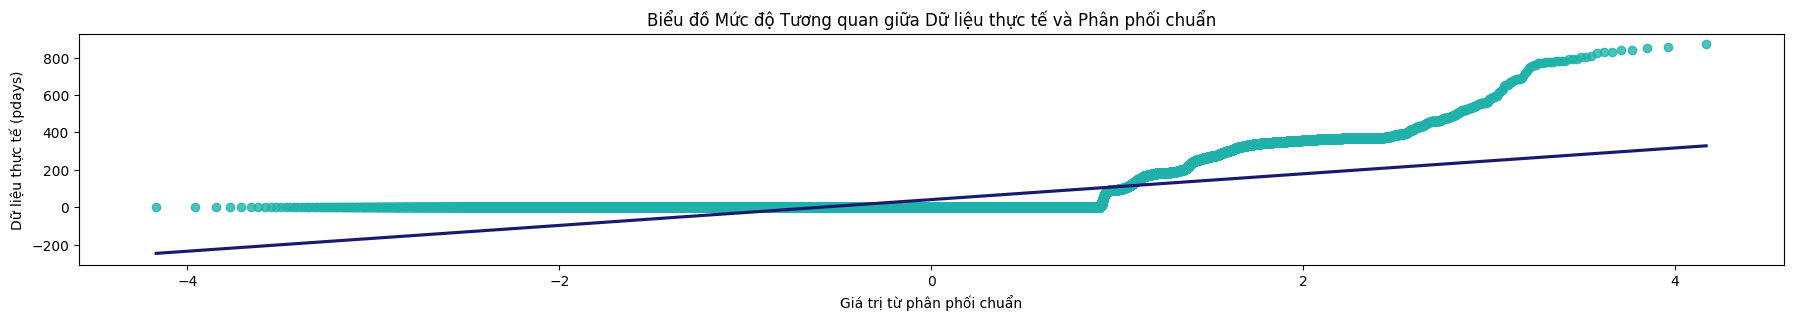

In [ ]:


# Tạo biểu đồ probplot và lấy giá trị cần thiết
probplot = stats.probplot(data["pdays"], dist="norm", fit=False)
x_values = probplot[0]
y_values = probplot[1]
plt.title("Biểu đồ Mức độ Tương quan giữa Dữ liệu thực tế và Phân phối chuẩn")
plt.xlabel("Giá trị từ phân phối chuẩn")
plt.ylabel("Dữ liệu thực tế (pdays)")
# Vẽ biểu đồ probplot bằng seaborn
sns.regplot(x=x_values, y=y_values, scatter_kws={'color': '#20B2AA'}, line_kws={'color': '#191970'})
# Hiển thị biểu đồ
plt.show()

In [ ]:
len(data[data['pdays']== -1])

36940

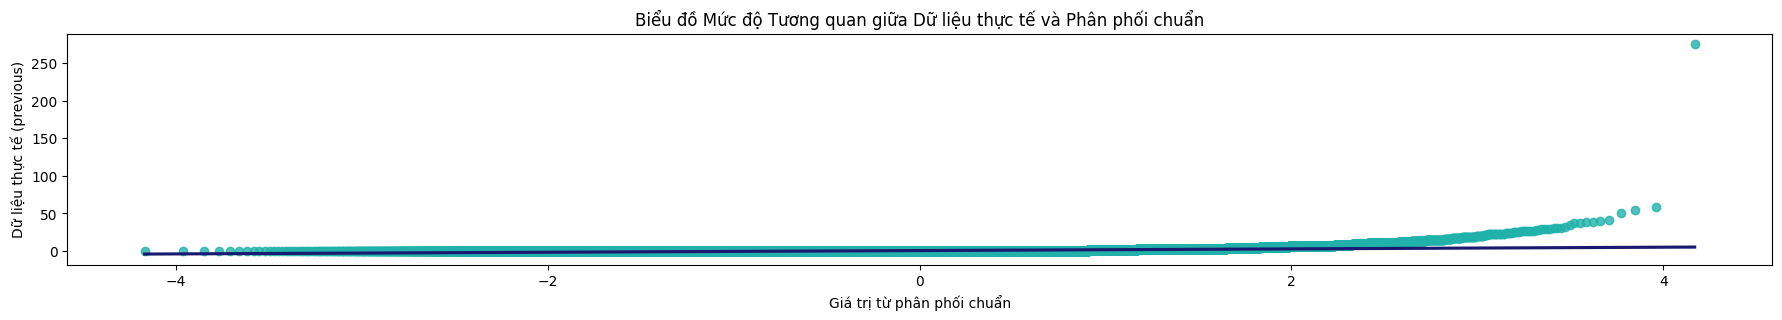

In [ ]:
# Tạo biểu đồ probplot và lấy giá trị cần thiết
probplot = stats.probplot(data["previous"], dist="norm", fit=False)
x_values = probplot[0]
y_values = probplot[1]
plt.title("Biểu đồ Mức độ Tương quan giữa Dữ liệu thực tế và Phân phối chuẩn")
plt.xlabel("Giá trị từ phân phối chuẩn")
plt.ylabel("Dữ liệu thực tế (previous)")
# Vẽ biểu đồ probplot bằng seaborn
sns.regplot(x=x_values, y=y_values, scatter_kws={'color': '#20B2AA'}, line_kws={'color': '#191970'})
# Hiển thị biểu đồ
plt.show()

<Axes: >

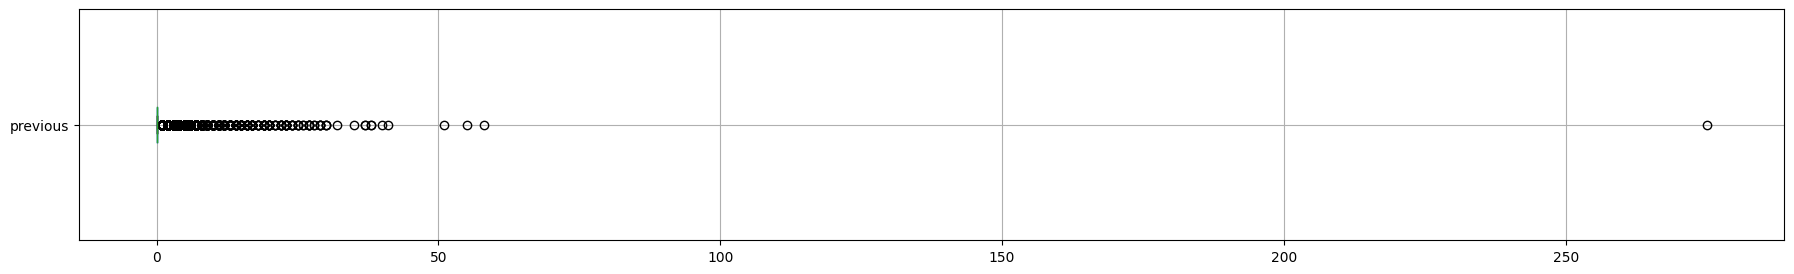

In [ ]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(data, columns=['previous'])
temp_df.boxplot(vert=False)

In [ ]:
data=data[data['previous']<=50]
data=data.reset_index(drop=True)

<Axes: >

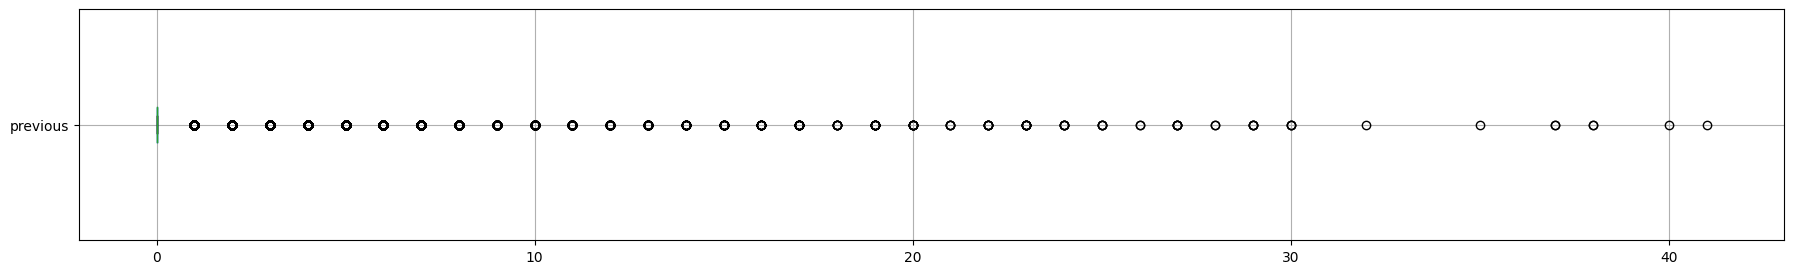

In [ ]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(data, columns=['previous'])
temp_df.boxplot(vert=False)

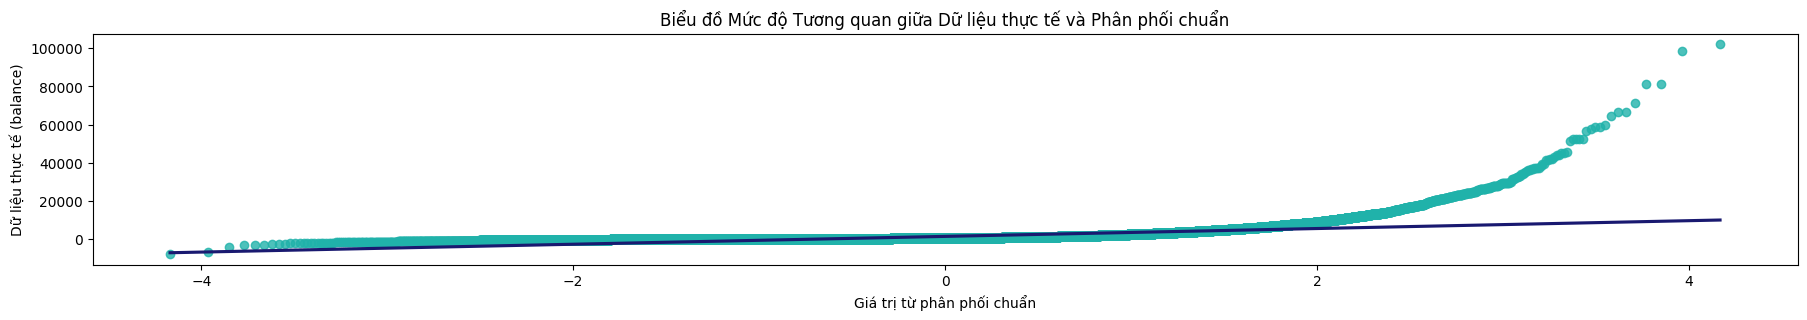

In [ ]:

# Tạo biểu đồ probplot và lấy giá trị cần thiết
probplot = stats.probplot(data["balance"], dist="norm", fit=False)
x_values = probplot[0]
y_values = probplot[1]
plt.title("Biểu đồ Mức độ Tương quan giữa Dữ liệu thực tế và Phân phối chuẩn")
plt.xlabel("Giá trị từ phân phối chuẩn")
plt.ylabel("Dữ liệu thực tế (balance)")
# Vẽ biểu đồ probplot bằng seaborn
sns.regplot(x=x_values, y=y_values, scatter_kws={'color': '#20B2AA'}, line_kws={'color': '#191970'})
# Hiển thị biểu đồ
plt.show()


<Axes: >

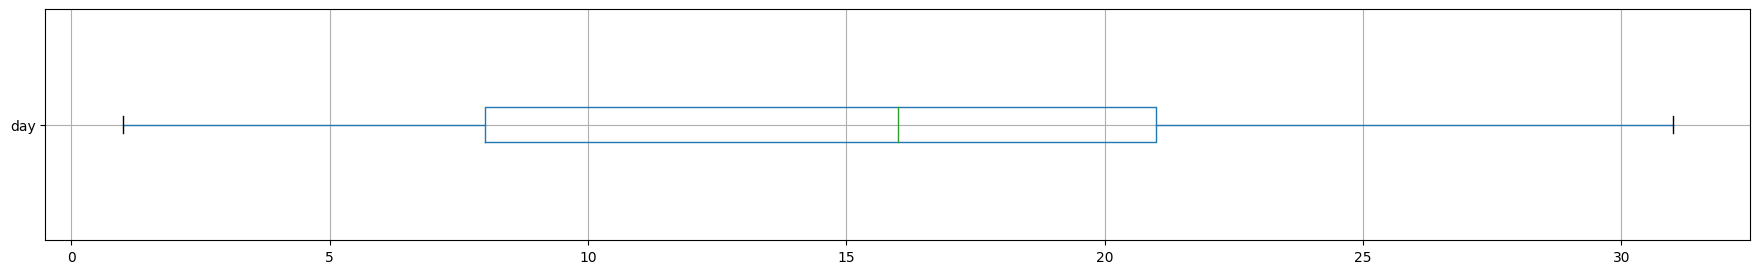

In [ ]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(data, columns=['day'])
temp_df.boxplot(vert=False)

<ipython-input-39-f7b836c60f93>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sb.heatmap(data.corr(), annot = True, fmt='.1g',


Text(220.72222222222223, 0.5, 'Features')

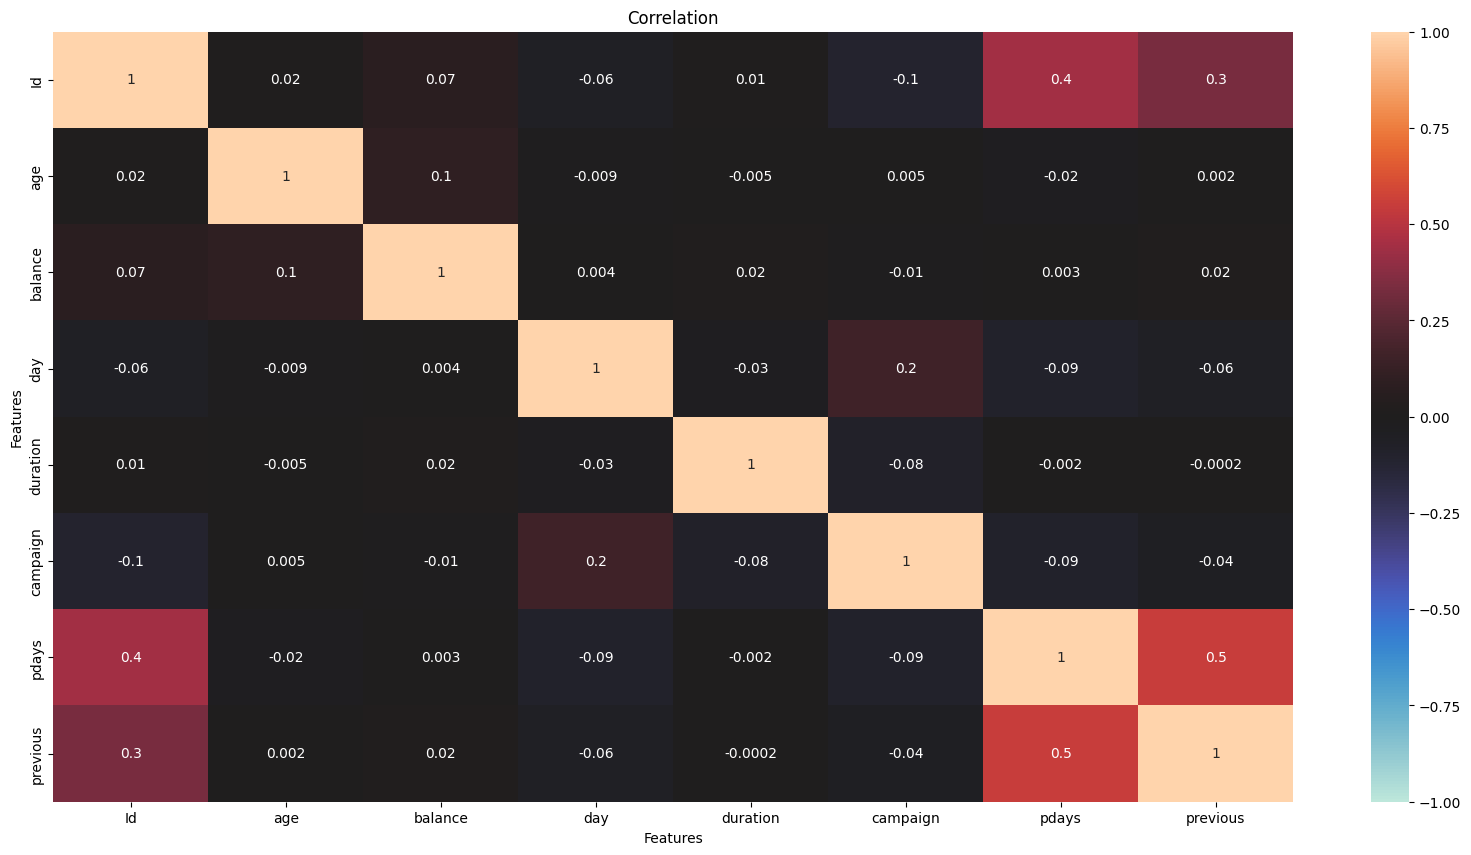

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sb.heatmap(data.corr(), annot = True, fmt='.1g',
                 vmin=-1, vmax=1, center= 0)
plt.title("Correlation", y=1)
plt.xlabel("Features")
plt.ylabel("Features")

In [ ]:
for col in data.columns:
  describe = data[col].describe()
  print("Stats for column '{}': \n{}".format(col, describe))
  print("")

Stats for column 'Id': 
count    45192.000000
mean     23609.383873
std      13047.028613
min       1002.000000
25%      12310.750000
50%      23608.500000
75%      34908.250000
max      46211.000000
Name: Id, dtype: float64

Stats for column 'age': 
count    45192.000000
mean        40.936095
std         10.618097
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Stats for column 'job': 
count           45192
unique             12
top       blue-collar
freq             9729
Name: job, dtype: object

Stats for column 'marital': 
count       45192
unique          3
top       married
freq        27205
Name: marital, dtype: object

Stats for column 'education': 
count         45192
unique            4
top       secondary
freq          23196
Name: education, dtype: object

Stats for column 'default': 
count     45192
unique        2
top          no
freq      44378
Name: default, dtype: object

Stats for 

Số khách hàng theo hosing:
yes    25115
no     20077
Name: housing, dtype: int64


<Axes: xlabel='housing', ylabel='count'>

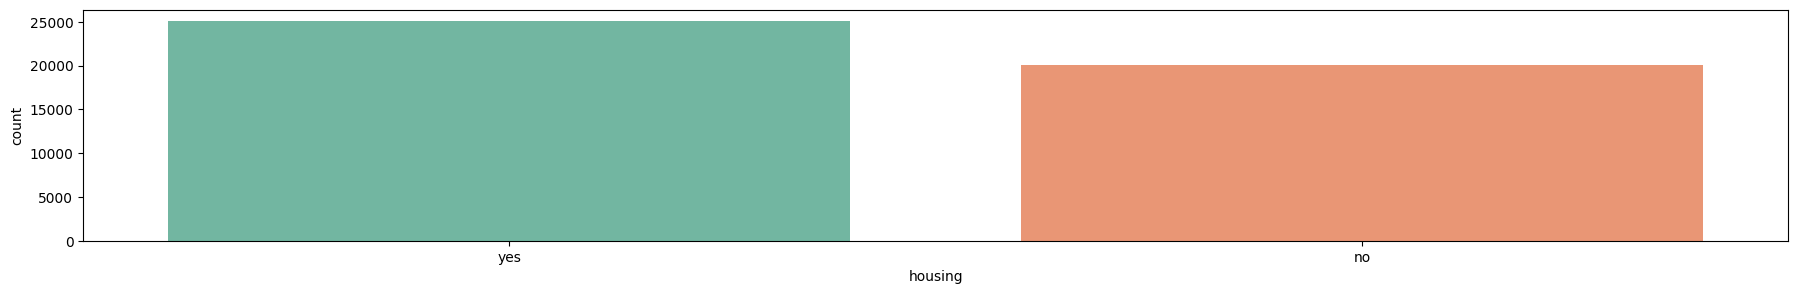

In [ ]:
print("Số khách hàng theo hosing:")
print(data['housing'].value_counts())
sb.countplot(x='housing', data=data, palette = 'Set2')

Số khách hàng nhóm theo marital :
married     27205
single      12781
divorced     5206
Name: marital, dtype: int64


<Axes: xlabel='marital', ylabel='count'>

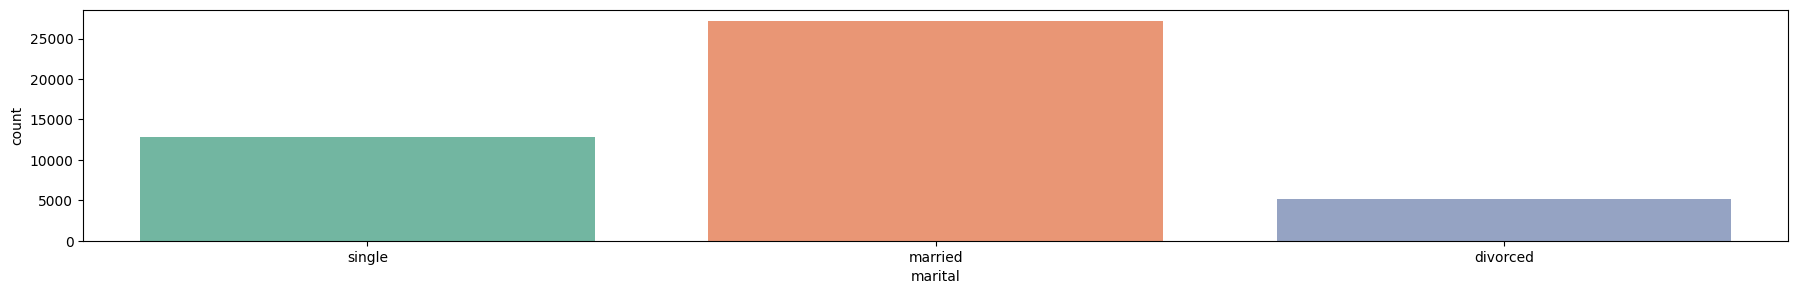

In [ ]:
print("Số khách hàng nhóm theo marital :")
print(data['marital'].value_counts())
sb.countplot(x='marital', data=data, palette = 'Set2')

## Data preprocessing

###Covert categorical data to nunberical

In [ ]:
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
categorical_cols

In [ ]:
for col in data.columns: #To Know unique values
    print(col,' ',data[col].nunique())

In [ ]:
encoder = LabelEncoder()
data['job'] = encoder.fit_transform(data['job'])
job = {index : label for index, label in enumerate(encoder.classes_)}
job

In [ ]:
data['marital'] = encoder.fit_transform(data['marital']) #encoding for marital
marital = {index : label for index, label in enumerate(encoder.classes_)}
marital

In [ ]:
data['education'] = encoder.fit_transform(data['education']) #encoding for education
education = {index : label for index, label in enumerate(encoder.classes_)}
education

In [ ]:
data['default'] = encoder.fit_transform(data['default']) #encoding for default
default = {index : label for index, label in enumerate(encoder.classes_)}
default

In [ ]:
data['loan'] = encoder.fit_transform(data['loan']) #encoding for Personal loan
loan = {index : label for index, label in enumerate(encoder.classes_)}
loan

In [ ]:
data['contact'] = encoder.fit_transform(data['contact'])
contact = {index : label for index, label in enumerate(encoder.classes_)}
contact

In [ ]:
data['poutcome'] = encoder.fit_transform(data['poutcome'])
poutcome = {index : label for index, label in enumerate(encoder.classes_)}
poutcome

In [ ]:
data['housing'] = encoder.fit_transform(data['housing'])
housing = {index : label for index, label in enumerate(encoder.classes_)}
housing

In [ ]:
data['month'] = data['month'].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,
                                   'jun':6,'jul':7,'aug':8,'sept':9,'oct':10,'nov':11,'dec':12})


In [ ]:
data.head() #View of data after encoding

###Scaling of data

In [ ]:
X = data.drop('y', axis=1)
y = data['y']

AttributeError: ignored

In [ ]:
# list categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'poutcome', 'pdays']

In [ ]:
# list numerical columns
num_cols = ['duration', 'balance', 'campaign','day', 'age', 'previous']

In [ ]:
from sklearn.preprocessing import StandardScaler
# rescale our numerical columns
scaler = StandardScaler()
scaler.fit(data[num_cols])
data_scaled = scaler.transform(data[num_cols])
columns_value_new = data[num_cols].columns
data_scaled_ok = pd.DataFrame(data_scaled, columns = columns_value_new)
data_scaled_ok.head(10)

TypeError: ignored

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data['y'] = (data.y == 'yes').astype('int')

##Xử lý mất cân bằng và train mô hình

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45192 entries, 0 to 45191
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45192 non-null  int64  
 1   age        45192 non-null  float64
 2   job        45192 non-null  int64  
 3   marital    45192 non-null  int64  
 4   education  45192 non-null  int64  
 5   default    45192 non-null  int64  
 6   balance    45192 non-null  float64
 7   housing    45192 non-null  int64  
 8   loan       45192 non-null  int64  
 9   contact    45192 non-null  int64  
 10  day        45192 non-null  int64  
 11  month      44613 non-null  float64
 12  duration   45192 non-null  int64  
 13  campaign   45192 non-null  int64  
 14  pdays      45192 non-null  int64  
 15  previous   45192 non-null  int64  
 16  poutcome   45192 non-null  int64  
 17  y          45192 non-null  int64  
dtypes: float64(3), int64(15)
memory usage: 6.2 MB


In [ ]:
# Now we need to combite all tables
# We will remove not nessasaries num cols
data1 = data.drop(num_cols, axis =1)
result = pd.concat([data1, data_scaled_ok], axis=1, join='inner')
display(result)

,Id,job,marital,education,default,housing,loan,contact,month,pdays,poutcome,y,duration,balance,campaign,day,age,previous
0,1002,9,2,1,0,1,0,2,5.0,-1,3,0,-0.416121,-0.437933,-0.569450,-1.298959,0.288558,-0.307445
1,1003,2,1,1,0,1,1,2,5.0,-1,3,0,-0.707438,-0.446799,-0.569450,-1.298959,-0.747420,-0.307445
2,1004,1,1,3,0,1,0,2,5.0,-1,3,0,-0.645290,0.047080,-0.569450,-1.298959,0.571098,-0.307445
3,1005,11,2,3,0,0,0,2,5.0,-1,3,0,-0.233563,-0.447127,-0.569450,-1.298959,-0.747420,-0.307445
4,1006,4,1,2,0,1,0,2,5.0,-1,3,0,-0.462732,-0.371601,-0.569450,-1.298959,-0.559061,-0.307445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45187,46207,9,1,2,0,0,0,0,11.0,-1,3,1,2.792246,-0.176545,0.076029,0.143069,0.947817,-0.307445
45188,46208,5,0,0,0,0,0,0,11.0,-1,3,1,0.768566,0.120308,-0.246711,0.143069,2.831415,-0.307445
45189,46209,5,1,1,0,0,0,0,11.0,184,2,1,3.374879,1.429217,0.721507,0.143069,2.925595,1.308769
45190,46210,1,1,1,0,0,0,1,11.0,-1,3,0,0.970546,-0.228100,0.398768,0.143069,1.512897,-0.307445


In [ ]:
result=result.drop(['Id'], axis = 1)

In [ ]:
Input = result.drop(['y'],axis = 1)
target = result['y']

train_input, test_input, train_target, test_target = train_test_split(Input, target, test_size = 0.3, random_state = 0)

print("Train Input Data Shape : {}, Test Input Data Shape : {}".format(train_input.shape, test_input.shape))
print("Train Target Data Shape : {}, Test Targett Data Shape : {}".format(train_target.shape, test_target.shape))

Train Input Data Shape : (31634, 16), Test Input Data Shape : (13558, 16)
Train Target Data Shape : (31634,), Test Targett Data Shape : (13558,)


In [ ]:
Input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45192 entries, 0 to 45191
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   job        45192 non-null  int64  
 1   marital    45192 non-null  int64  
 2   education  45192 non-null  int64  
 3   default    45192 non-null  int64  
 4   housing    45192 non-null  int64  
 5   loan       45192 non-null  int64  
 6   contact    45192 non-null  int64  
 7   month      44613 non-null  float64
 8   pdays      45192 non-null  int64  
 9   poutcome   45192 non-null  int64  
 10  duration   45192 non-null  float64
 11  balance    45192 non-null  float64
 12  campaign   45192 non-null  float64
 13  day        45192 non-null  float64
 14  age        45192 non-null  float64
 15  previous   45192 non-null  float64
dtypes: float64(7), int64(9)
memory usage: 5.5 MB


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
#Evaluation
from sklearn import metrics
#UnderSampling
from imblearn.under_sampling import RandomUnderSampler

#OverSampling
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

#UnderOverSampling
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

###UnderSamping

In [ ]:
rf = RandomForestClassifier()

In [ ]:
a = [0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5]  #  value ratio : 0.3 ~ 0.5
accuracy = []
recall = []
precision = []
f1_score_list = []

for i in a:
    Rd_under = RandomUnderSampler(sampling_strategy=i)
    train_input_res, train_target_res = Rd_under.fit_resample(train_input, train_target)

    # Check and handle NaN values in input features for training data
    if train_input_res.isnull().values.any():
        train_input_res = train_input_res.fillna(0)  # Replace NaN with 0 as an example

    # Check and handle NaN values in input features for test data
    if test_input.isnull().values.any():
        test_input = test_input.fillna(0)  # Replace NaN with 0 as an example

    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(train_input_res, train_target_res)

    # Evaluate the model
    predictions = rf.predict(test_input)
    accuracy.append(accuracy_score(test_target, predictions))
    recall.append(recall_score(test_target, predictions))
    precision.append(precision_score(test_target, predictions))
    f1_score_list.append(f1_score(test_target, predictions))

# Create a DataFrame to store the results
rdu_score_dataframe = pd.DataFrame({'accuracy': accuracy, 'recall': recall, 'precision': precision,
                                     'f1_score': f1_score_list}, index=a)

# Display the results
rdu_score_dataframe.style.background_gradient(cmap='Wistia')


,accuracy,recall,precision,f1_score
0.300000,0.901460,0.697586,0.560776,0.621744
0.325000,0.899543,0.709022,0.552475,0.621035
0.350000,0.893716,0.726175,0.530887,0.613362
0.375000,0.893126,0.749682,0.527964,0.619585
0.400000,0.888995,0.759212,0.514864,0.613607
0.425000,0.887594,0.781449,0.510373,0.617470
0.450000,0.886488,0.778907,0.507240,0.614382
0.475000,0.879333,0.800508,0.487994,0.606352
0.500000,0.882579,0.821474,0.496544,0.618956


In [ ]:
#SMOTE

# Assuming 'data' is your DataFrame
Input = result.drop(['y'],axis = 1)
target = result['y']

# Handle NaN values in the input features for both training and test data
Input = Input.fillna(0)  # Replace NaN with 0 as an example

train_input, test_input, train_target, test_target = train_test_split(Input, target, test_size=0.3, random_state=0)

print("Train Input Data Shape: {}, Test Input Data Shape: {}".format(train_input.shape, test_input.shape))
print("Train Target Data Shape: {}, Test Target Data Shape: {}".format(train_target.shape, test_target.shape))

a = [0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5]  # Response value ratio : 0.3 ~ 0.5
accuracy = []
recall = []
precision = []
f1_score_list = []

for i in a:
    smote = SMOTE(sampling_strategy=i)
    train_input_res, train_target_res = smote.fit_resample(train_input, train_target)

    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(train_input_res, train_target_res)

    # Evaluate the model
    predictions = rf.predict(test_input)
    accuracy.append(metrics.accuracy_score(test_target, predictions))
    recall.append(metrics.recall_score(test_target, predictions))
    precision.append(metrics.precision_score(test_target, predictions))
    f1_score_list.append(metrics.f1_score(test_target, predictions))

# Create a DataFrame to store the results
sm_score_dataframe = pd.DataFrame({'accuracy': accuracy, 'recall': recall, 'precision': precision,
                                   'f1_score': f1_score_list}, index=a)

# Display the results
sm_score_dataframe.style.background_gradient(cmap='Wistia')


Train Input Data Shape: (31634, 16), Test Input Data Shape: (13558, 16)
Train Target Data Shape: (31634,), Test Target Data Shape: (13558,)


,accuracy,recall,precision,f1_score
0.300000,0.907066,0.570521,0.605938,0.587696
0.325000,0.908025,0.588945,0.607073,0.597872
0.350000,0.908099,0.597205,0.605670,0.601408
0.375000,0.906402,0.597840,0.596703,0.597271
0.400000,0.904263,0.588945,0.587452,0.588198
0.425000,0.904779,0.602922,0.587616,0.595171
0.450000,0.903009,0.601017,0.579302,0.589959
0.475000,0.905443,0.623888,0.587321,0.605052
0.500000,0.904263,0.630241,0.580796,0.604509


In [ ]:
#ADASYN
# Assuming 'data' is your DataFrame
Input = data.drop(['y'], axis=1)
target = data['y']

# Handle NaN values in the input features for both training and test data
Input = Input.fillna(0)  # Replace NaN with 0 as an example

train_input, test_input, train_target, test_target = train_test_split(Input, target, test_size=0.3, random_state=0)

print("Train Input Data Shape: {}, Test Input Data Shape: {}".format(train_input.shape, test_input.shape))
print("Train Target Data Shape: {}, Test Target Data Shape: {}".format(train_target.shape, test_target.shape))

a=[0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5]   #Response value ratio : 0.3 ~ 0.5
accuracy=[]
recall=[]
precision=[]
f1_score=[]

for i in a:
    ada=ADASYN(sampling_strategy = i)
    train_input_res, train_target_res = ada.fit_resample(train_input, train_target)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
    rf.fit(train_input_res, train_target_res)

    accuracy.append(metrics.accuracy_score(test_target, rf.predict(test_input)))
    recall.append(metrics.recall_score(test_target, rf.predict(test_input)))
    precision.append(metrics.precision_score(test_target, rf.predict(test_input)))
    f1_score.append(metrics.f1_score(test_target, rf.predict(test_input)))

adasyn_score_dataframe = pd.DataFrame({'accuracy' : accuracy, 'recall' : recall, 'precision' : precision,
                                'f1_score': f1_score}, index=a)

adasyn_score_dataframe.style.background_gradient(cmap='Wistia')

Train Input Data Shape: (31634, 17), Test Input Data Shape: (13558, 17)
Train Target Data Shape: (31634,), Test Target Data Shape: (13558,)


,accuracy,recall,precision,f1_score
0.300000,0.908615,0.653113,0.597327,0.623976
0.325000,0.908762,0.685515,0.592532,0.635641
0.350000,0.905591,0.666455,0.581486,0.621078
0.375000,0.904779,0.675985,0.576694,0.622404
0.400000,0.905222,0.688056,0.576985,0.627644
0.425000,0.903894,0.684879,0.571883,0.623302
0.450000,0.904632,0.703304,0.572685,0.631309
0.475000,0.901460,0.701398,0.560406,0.623025
0.500000,0.903083,0.714104,0.565392,0.631106


###UnderOversampling

In [ ]:
# Assuming 'data' is your DataFrame
Input = result.drop(['y'],axis = 1)
target = result['y']

# Handle NaN values in the input features for both training and test data
Input = Input.fillna(0)  # Replace NaN with 0 as an example

train_input, test_input, train_target, test_target = train_test_split(Input, target, test_size=0.3, random_state=0)

print("Train Input Data Shape: {}, Test Input Data Shape: {}".format(train_input.shape, test_input.shape))
print("Train Target Data Shape: {}, Test Target Data Shape: {}".format(train_target.shape, test_target.shape))
#SMOTEENN
a=[0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5]   #Response value ratio : 0.3 ~ 0.5
accuracy=[]
recall=[]
precision=[]
f1_score=[]

for i in a:
    smoteenn=SMOTEENN(sampling_strategy=i)
    train_input_res, train_target_res=smoteenn.fit_resample(train_input, train_target)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
    rf.fit(train_input_res, train_target_res)

    accuracy.append(metrics.accuracy_score(test_target, rf.predict(test_input)))
    recall.append(metrics.recall_score(test_target, rf.predict(test_input)))
    precision.append(metrics.precision_score(test_target, rf.predict(test_input)))
    f1_score.append(metrics.f1_score(test_target, rf.predict(test_input)))

smoteenn_score_dataframe = pd.DataFrame({'accuracy' : accuracy, 'recall' : recall, 'precision' : precision,
                                'f1_score': f1_score}, index=a)

smoteenn_score_dataframe.style.background_gradient(cmap='Wistia')

Train Input Data Shape: (31634, 16), Test Input Data Shape: (13558, 16)
Train Target Data Shape: (31634,), Test Target Data Shape: (13558,)


,accuracy,recall,precision,f1_score
0.300000,0.902345,0.679161,0.566208,0.617562
0.325000,0.902198,0.705845,0.562817,0.626268
0.350000,0.896887,0.723634,0.541865,0.619695
0.375000,0.893200,0.729987,0.529006,0.613454
0.400000,0.894896,0.756036,0.533393,0.625493
0.425000,0.890913,0.760483,0.520661,0.618125
0.450000,0.888258,0.769377,0.512484,0.615189
0.475000,0.884939,0.780813,0.502864,0.611747
0.500000,0.885603,0.783355,0.504707,0.613891


In [ ]:
#SMOTETomek
# Assuming 'data' is your DataFrame
Input = result.drop(['y'],axis = 1)
target = result['y']

# Handle NaN values in the input features for both training and test data
Input = Input.fillna(0)  # Replace NaN with 0 as an example

train_input, test_input, train_target, test_target = train_test_split(Input, target, test_size=0.3, random_state=0)

print("Train Input Data Shape: {}, Test Input Data Shape: {}".format(train_input.shape, test_input.shape))
print("Train Target Data Shape: {}, Test Target Data Shape: {}".format(train_target.shape, test_target.shape))
a=[0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5]   #Response value ratio : 0.3 ~ 0.5
accuracy=[]
recall=[]
precision=[]
f1_score=[]

for i in a:
    smo_tom=SMOTETomek(sampling_strategy=i)
    train_input_res, train_target_res=smo_tom.fit_resample(train_input, train_target)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
    rf.fit(train_input_res, train_target_res)

    accuracy.append(metrics.accuracy_score(test_target, rf.predict(test_input)))
    recall.append(metrics.recall_score(test_target, rf.predict(test_input)))
    precision.append(metrics.precision_score(test_target, rf.predict(test_input)))
    f1_score.append(metrics.f1_score(test_target, rf.predict(test_input)))

smo_tom_score_dataframe = pd.DataFrame({'accuracy' : accuracy, 'recall' : recall, 'precision' : precision,
                                'f1_score': f1_score}, index=a)

smo_tom_score_dataframe.style.background_gradient(cmap='Wistia')


Train Input Data Shape: (31634, 16), Test Input Data Shape: (13558, 16)
Train Target Data Shape: (31634,), Test Target Data Shape: (13558,)


,accuracy,recall,precision,f1_score
0.300000,0.907877,0.571792,0.610169,0.590357
0.325000,0.907287,0.586404,0.603663,0.594908
0.350000,0.907066,0.589581,0.601816,0.595635
0.375000,0.906918,0.591487,0.600645,0.596031
0.400000,0.903968,0.588310,0.586076,0.587191
0.425000,0.904411,0.606099,0.585276,0.595506
0.450000,0.905222,0.608640,0.588814,0.598563
0.475000,0.904706,0.614994,0.585248,0.599752
0.500000,0.903304,0.615629,0.578507,0.596491


##Visualization

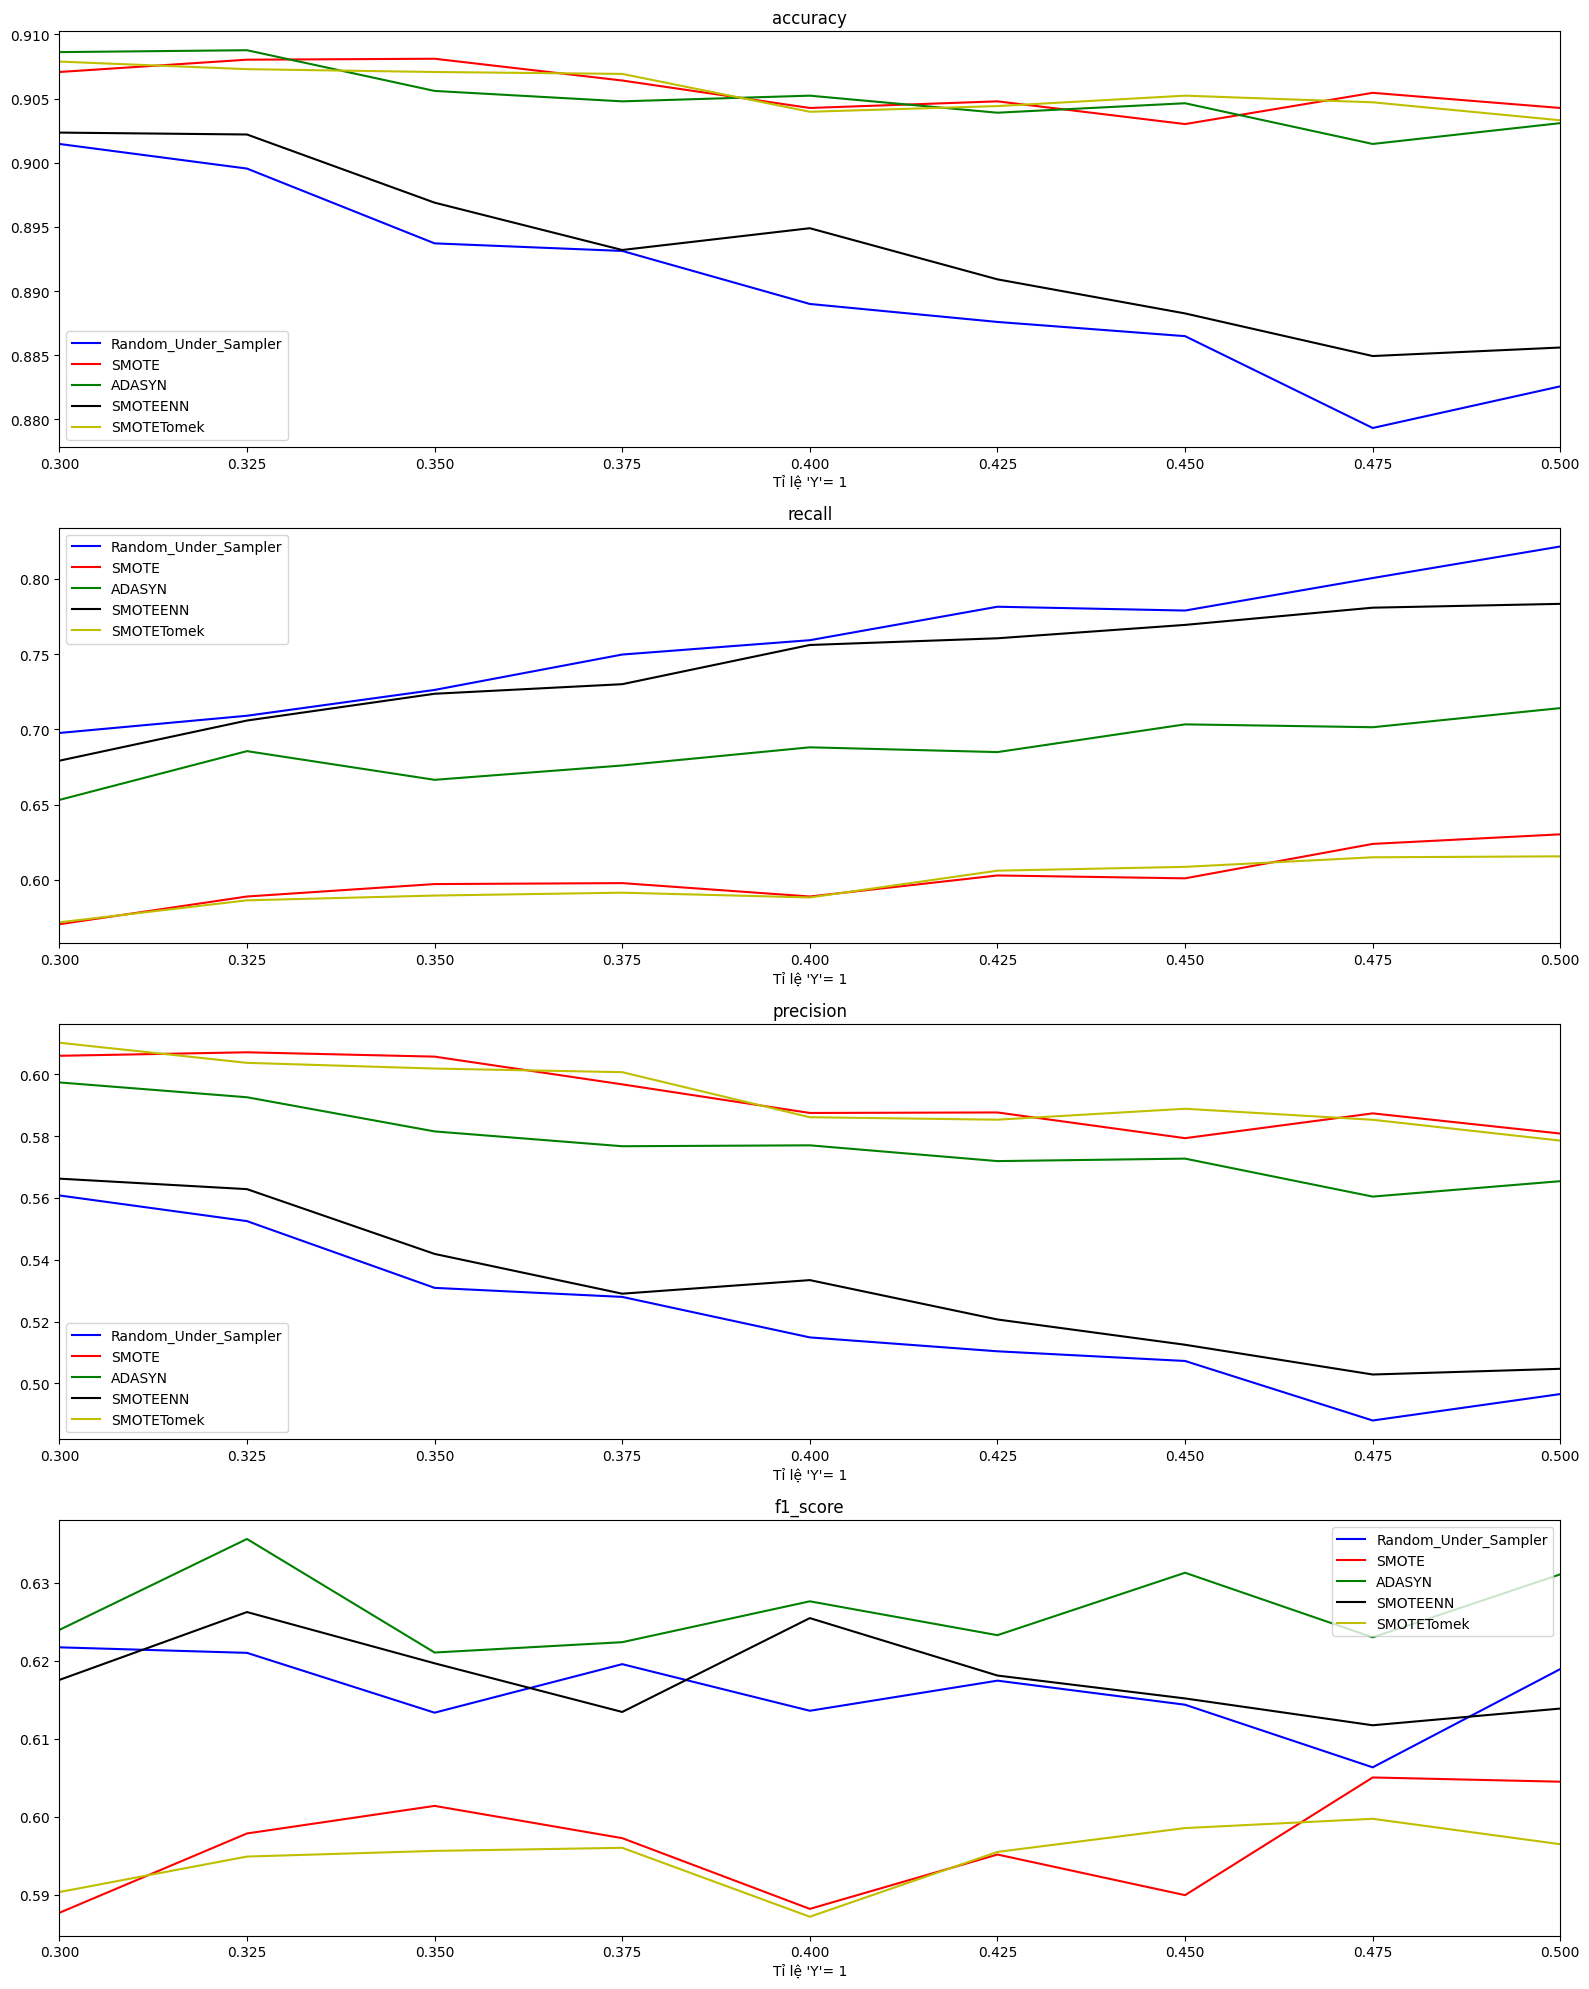

In [ ]:
f, ax = plt.subplots(4, 1, figsize = (16,20))

for i in range(4):
  ax[i].plot(rdu_score_dataframe.index, rdu_score_dataframe.iloc[:,i], c = "b")
  ax[i].plot(sm_score_dataframe.index, sm_score_dataframe.iloc[:,i], c = "r")
  ax[i].plot(adasyn_score_dataframe.index, adasyn_score_dataframe.iloc[:,i], c = "g")
  ax[i].plot(smoteenn_score_dataframe.index, smoteenn_score_dataframe.iloc[:,i], c = "k")
  ax[i].plot(smo_tom_score_dataframe.index, smo_tom_score_dataframe.iloc[:,i], c = "y")

  ax[i].legend(["Random_Under_Sampler", "SMOTE", "ADASYN", "SMOTEENN", "SMOTETomek"])
  ax[i].set_title(rdu_score_dataframe.columns[i])
  ax[i].set_xlabel("Tỉ lệ 'Y'= 1")
  ax[i].set_xlim(0.3,0.5)

plt.tight_layout()
plt.show()

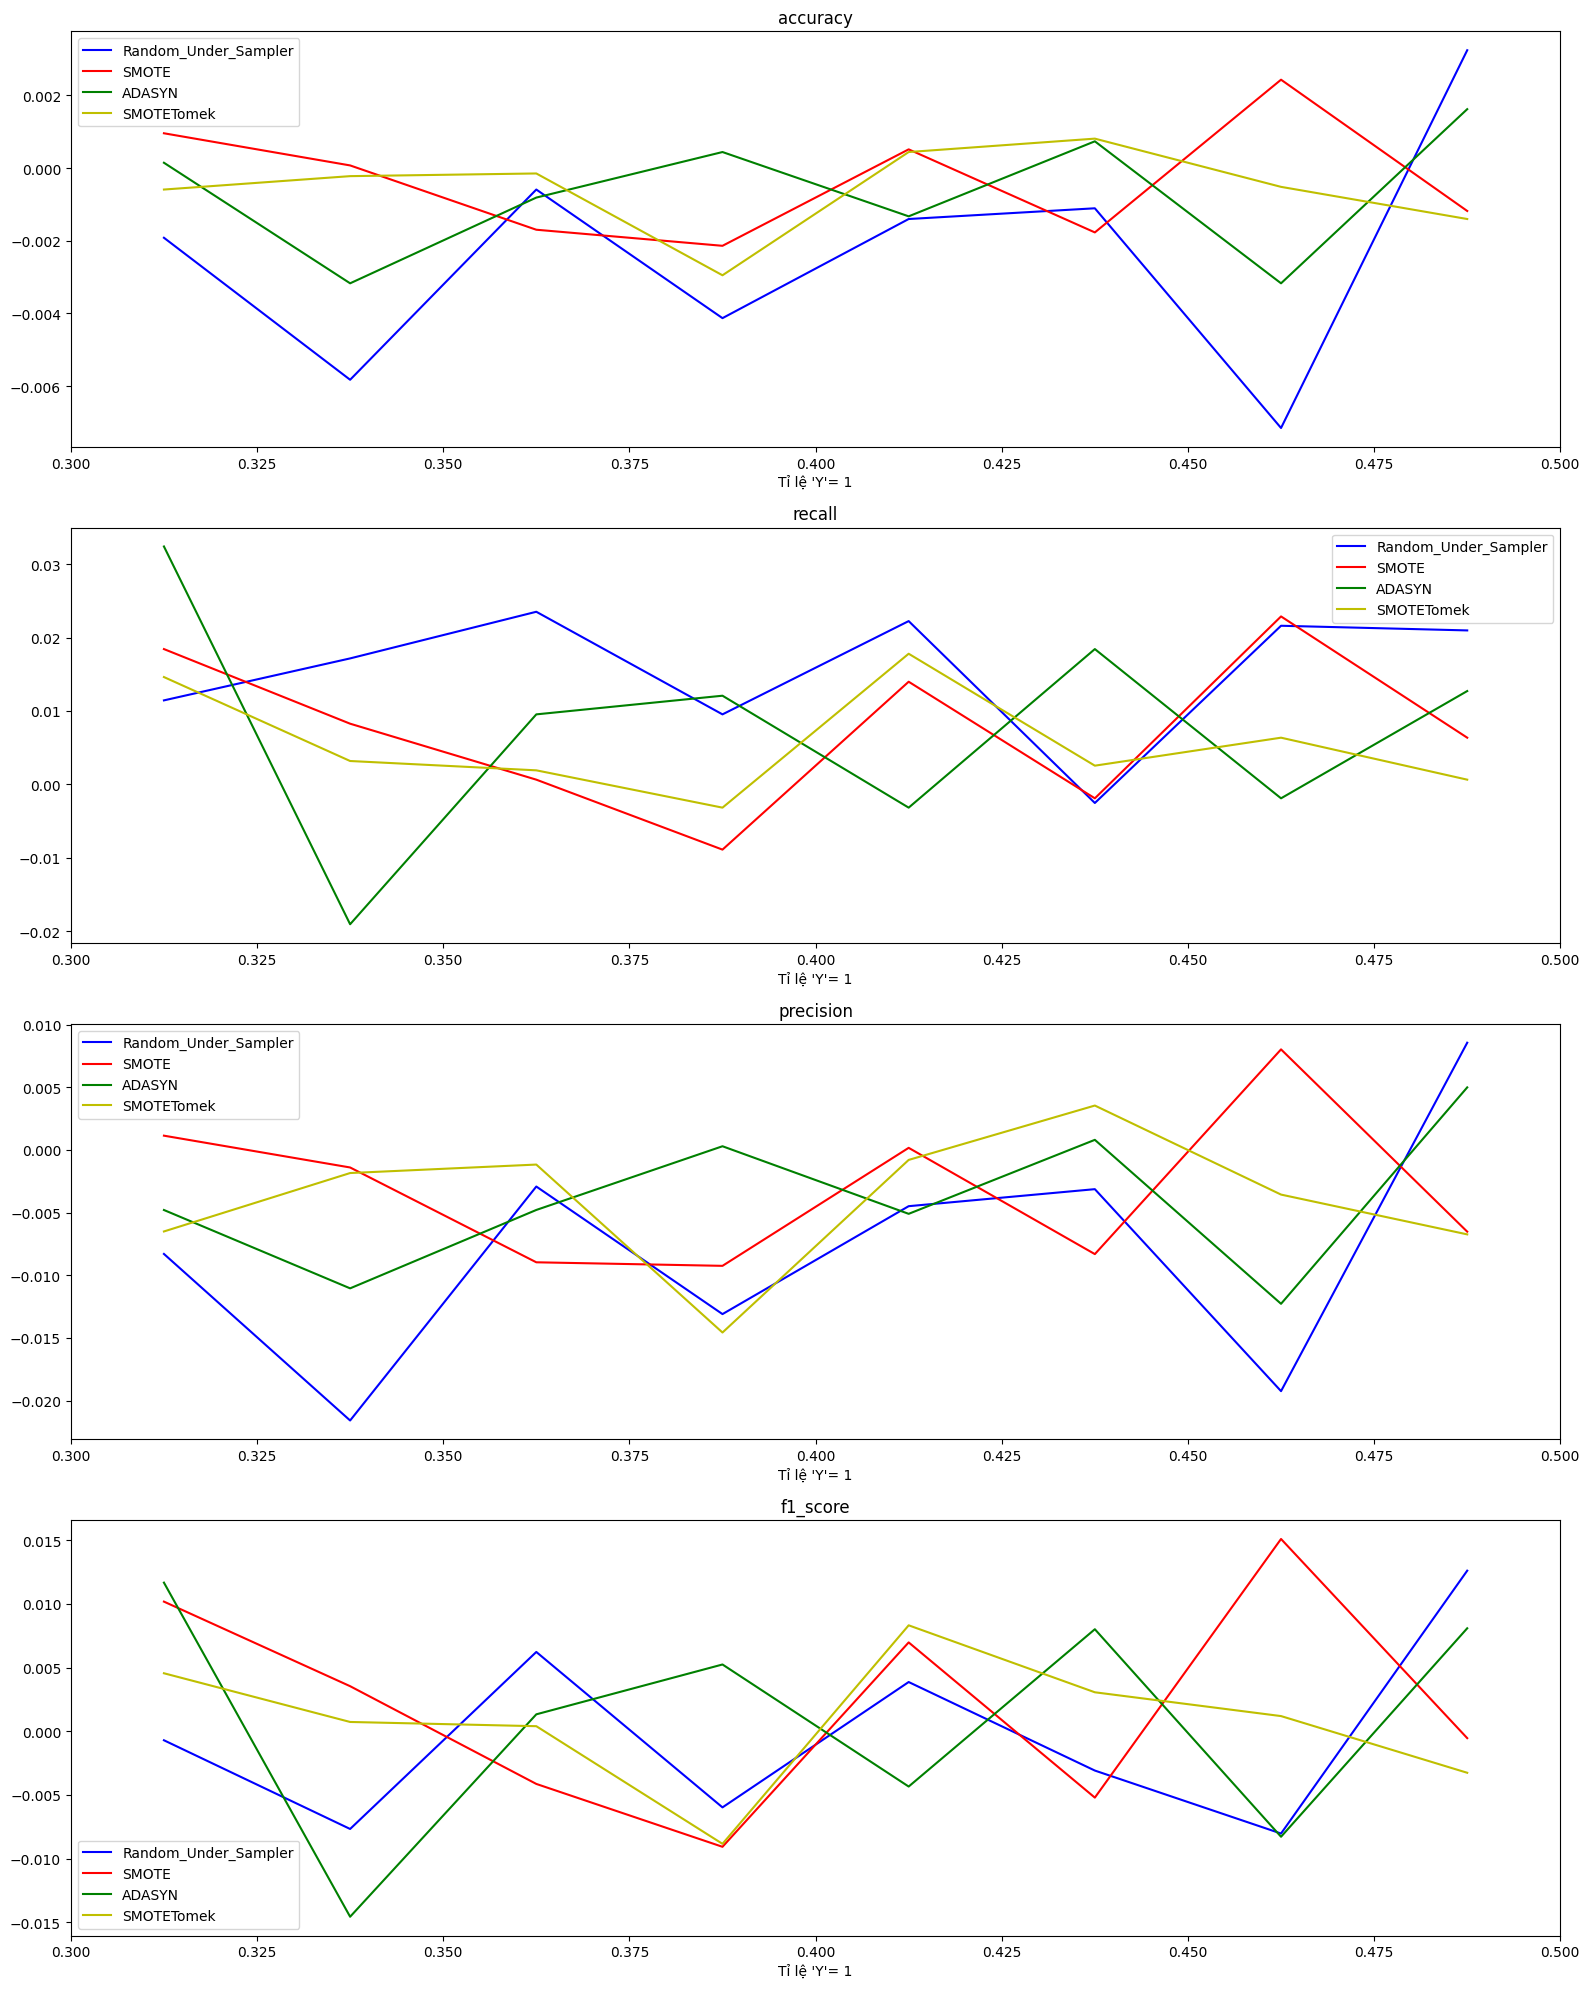

In [ ]:
s = [rdu_score_dataframe,sm_score_dataframe,adasyn_score_dataframe,smo_tom_score_dataframe]
colors = ["b", "r","g", "y"]
style = ["-", "-", "-","-"]

f, ax = plt.subplots(4, 1, figsize = (16,20))

for idx in range(4):
  df = s[idx]
  for c in range(4):
    value_list = []
    for i in range(1, len(df)):
      value = df.iloc[i,c] - df.iloc[i-1,c]
      value_list.append(value)
    ax[c].plot(df.index[:8] + [0.0125]*8, value_list, c = colors[idx], linestyle = style[idx])

for c in range(4):
  ax[c].legend(["Random_Under_Sampler", "SMOTE","ADASYN", "SMOTETomek"])
  ax[c].set_title(rdu_score_dataframe.columns[c])
  ax[c].set_xlabel("Tỉ lệ 'Y'= 1")
  ax[c].set_xlim(0.3,0.5)

plt.tight_layout()
plt.show()


##Train mô hình Ramdom Forest tỉ lệ 0.35

In [ ]:
ad=ADASYN(sampling_strategy=0.3,random_state=0)
train_input_adasyn, train_target_adasyn=ad.fit_resample(train_input, train_target)
#Then, training the classifier model with train_input_smote data
rf_best = RandomForestClassifier(n_estimators=200,random_state=0)
rf_best.fit(train_input_adasyn, train_target_adasyn)
prediction_best = rf_best.predict(test_input)
print('Accuracy for Random Forest is :', metrics.accuracy_score(test_target, prediction_best))
print('Recall for Random Forest is :', metrics.recall_score(test_target, prediction_best))
print("Precision for Random Forest is:", metrics.precision_score(test_target, prediction_best))
print("F1 Score for Random Forest is :", metrics.f1_score(test_target, prediction_best))

Accuracy for Random Forest is : 0.9062546098244579
Recall for Random Forest is : 0.5902160101651842
Precision for Random Forest is: 0.5974276527331189
F1 Score for Random Forest is : 0.5937999360818152


In [ ]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_best, 'ADRandomForest.joblib')

# Now, you can load the model later using:
# loaded_model = joblib.load('random_forest_model.joblib')


['ADRandomForest.joblib']

In [ ]:
#Confusion Matrix¶

f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(confusion_matrix(test_target, prediction_best), annot = True, fmt='2.0f')
plt.subplots_adjust(hspace = 0.2, wspace = 0.2)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##Train mô hình chưa xử lý mất cân bằng


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [ ]:
data.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1002,44.0,9,2,1,0,29.0,1,0,2,5,5.0,151,1,-1,0,3,0
1,1003,33.0,2,1,1,0,2.0,1,1,2,5,5.0,76,1,-1,0,3,0
2,1004,47.0,1,1,3,0,1506.0,1,0,2,5,5.0,92,1,-1,0,3,0
3,1005,33.0,11,2,3,0,1.0,0,0,2,5,5.0,198,1,-1,0,3,0
4,1006,35.0,4,1,2,0,231.0,1,0,2,5,5.0,139,1,-1,0,3,0


In [ ]:
data=data.drop(columns=['Id'])

In [ ]:
X = data.drop(columns=['y'])
y = data['y']

AttributeError: ignored

In [ ]:
data=data.dropna(inplace=True)

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
print("Train Input Data Shape: {}, Test Input Data Shape: {}".format(X_train.shape, X_test.shape))
print("Train Target Data Shape: {}, Test Target Data Shape: {}".format(y_train.shape, y_test.shape))

Train Input Data Shape: (36153, 16), Test Input Data Shape: (9039, 16)
Train Target Data Shape: (36153,), Test Target Data Shape: (9039,)


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)
print('Accuracy for Random Forest is :', metrics.accuracy_score(y_test, prediction))
print('Recall for Random Forest is :', metrics.recall_score(y_test, prediction))
print("Precision for Random Forest is:", metrics.precision_score(y_test, prediction))
print("F1 Score for Random Forest is :", metrics.f1_score(y_test, prediction))

NameError: ignored

#Web

In [ ]:
!pip install anvil-uplink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=c59fddc4042fa28af9844074e27307ad06566a7d2cebe9dac33207b551519e00
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


In [ ]:
from getpass import getpass
uplink_key = getpass('Enter your Uplink key: ')

Enter your Uplink key: ··········


In [ ]:
import anvil.server


In [ ]:
anvil.server.connect(uplink_key)

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [ ]:
!pip freeze requirements.txt


absl-py==1.4.0
aiohttp==3.9.1
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anvil-uplink==0.4.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.1
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.15.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.1
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.7
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.7
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.2
cvxpy==1.

In [ ]:
anvil.server.wait_forever()

KeyboardInterrupt: ignored

In [ ]:
y=["Yes","No"]

In [ ]:
from joblib import load
import numpy as np

# Load mô hình từ tệp
loaded_model = load('ADRandomForest.joblib')

@anvil.server.callable
def predict(val1, val2, val3, val4, val5, val6, val7, val8, val9, val10, val11, val12, val13, val14, val15, val16):
    mean = np.array([[40.936095, 4.339728, 1.167618, 1.224708, 0.018012, 1362.629226, 0.555740, 0.160205, 0.639981, 15.809435, 6.107794, 258.131152, 2.764427, 40.177708, 0.570676, 2.560077]])
    std = np.array([[10.618097, 3.272700, 0.608215, 0.747919, 0.132996, 3045.317760, 0.496889, 0.366800, 0.897831, 8.321706, 2.401296, 257.454697, 3.098510, 100.065929, 1.856210, 0.988962]])
    i=0
    X_new = np.array([[val1, val2, val3, val4, val5, val6, val7, val8, val9, val10, val11, val12, val13, val14, val15, val16]])

    for v in X_new:
      ct=(v-mean)/std
      stxnew=ct
      if i==16:
          break
      p=loaded_model.predict(stxnew)
    return y[int(p)]